# Zestaw zadań: Równania różniczkowe zywczajne
## Zadanie 3
### Autor: Artur Gęsiarz

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

### Parametry modelu

In [315]:
beta = 1
gamma = 1 / 7

### Warunki początkowe

In [316]:
S0 = 762
I0 = 1
R0 = 0
N = S0 + I0 + R0

### Czas

In [317]:
t_span = (0, 14)
t_eval = np.arange(0, 14.2, 0.2)

### Funkcja opisująca model SIR

In [318]:
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * I * S
    dIdt = beta * I * S - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

### Metoda jawna Eulera

In [319]:
def euler_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        y[i + 1] = y[i] + h * np.array(f(t[i], y[i], beta, gamma))

    return t, y

### Metoda niejawna Eulera

In [320]:
def implicit_euler_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        y_pred = y[i] + h * np.array(f(t[i], y[i], beta, gamma))
        y[i + 1] = y[i] + h * np.array(f(t[i + 1], y_pred, beta, gamma))

    return t, y

### Metoda Rungego-Kutty czwartego rzędu (RK4)

In [321]:
def rk4_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        k1 = np.array(f(t[i], y[i], beta, gamma))
        k2 = np.array(f(t[i] + h/2, y[i] + h*k1/2, beta, gamma))
        k3 = np.array(f(t[i] + h/2, y[i] + h*k2/2, beta, gamma))
        k4 = np.array(f(t[i] + h, y[i] + h*k3, beta, gamma))
        y[i + 1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y

### Początkowe wartości

In [322]:
y0 = [S0, I0, R0]

### Rozwiązanie układu metodą jawna Eulera

In [323]:
t_euler, y_euler = euler_method(sir_model, t_span, y0, 0.2, beta, gamma)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:3: RuntimeWarning: overflow encountered in scalar multiply
  dSdt = -beta * I * S
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * I * S - gamma * I
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  dIdt = beta * I * S - gamma * I


### Rozwiązanie układu metodą niejawna Eulera

In [324]:
t_implicit_euler, y_implicit_euler = implicit_euler_method(sir_model, t_span, y0, 0.2, beta, gamma)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:3: RuntimeWarning: overflow encountered in scalar multiply
  dSdt = -beta * I * S
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * I * S - gamma * I
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  dIdt = beta * I * S - gamma * I


### Rozwiązanie układu metodą Rungego-Kutty czwartego rzędu (RK4)

In [325]:
t_rk4, y_rk4 = rk4_method(sir_model, t_span, y0, 0.2, beta, gamma)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:3: RuntimeWarning: overflow encountered in scalar multiply
  dSdt = -beta * I * S
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * I * S - gamma * I
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/875167257.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  dIdt = beta * I * S - gamma * I


### Wykresy komponentów rozwiązania (S, I, R)

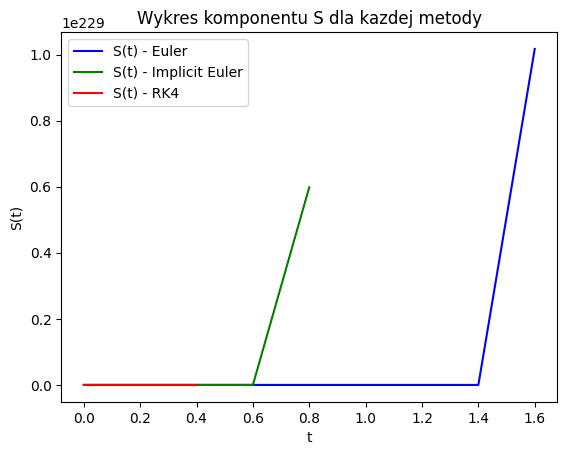

In [326]:
plt.title("Wykres komponentu S dla kazdej metody")
plt.plot(t_euler, y_euler[:, 0], 'b', label='S(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 0], 'g', label='S(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 0], 'r', label='S(t) - RK4')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.legend()
plt.show()

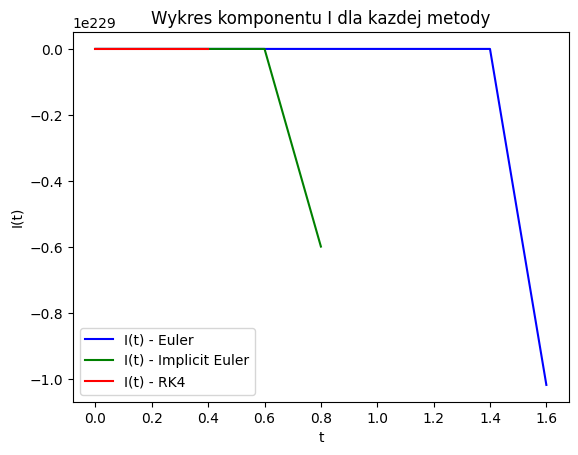

In [327]:
plt.title("Wykres komponentu I dla kazdej metody")
plt.plot(t_euler, y_euler[:, 1], 'b', label='I(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 1], 'g', label='I(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 1], 'r', label='I(t) - RK4')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.legend()
plt.show()

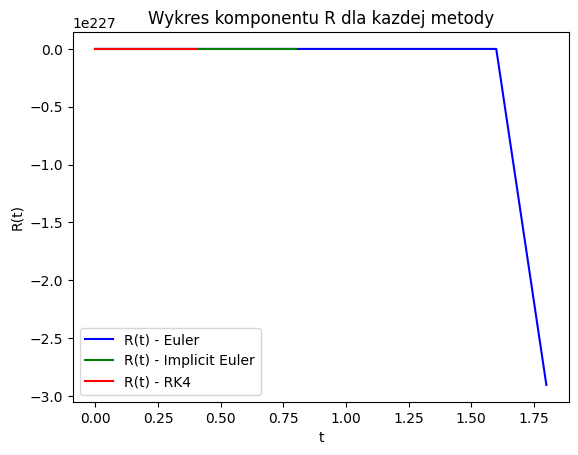

In [328]:
plt.title("Wykres komponentu R dla kazdej metody")
plt.plot(t_euler, y_euler[:, 2], 'b', label='R(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 2], 'g', label='R(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 2], 'r', label='R(t) - RK4')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.legend()
plt.show()

### Wykres S(t) + I(t) + R(t) dla każdej metody

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_79760/1947586780.py:2: RuntimeWarning: invalid value encountered in add
  plt.plot(t_euler, y_euler[:, 0] + y_euler[:, 1] + y_euler[:, 2], 'b', label='Euler')


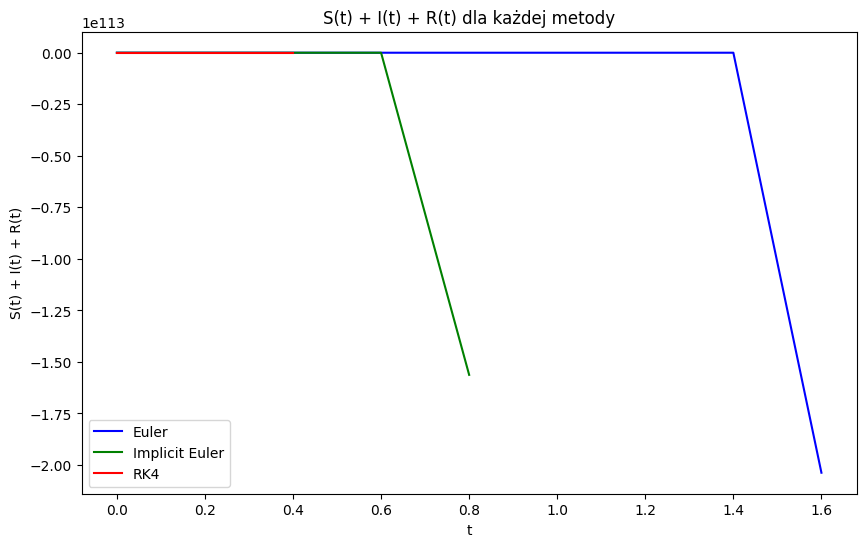

In [329]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler[:, 0] + y_euler[:, 1] + y_euler[:, 2], 'b', label='Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 0] + y_implicit_euler[:, 1] + y_implicit_euler[:, 2], 'g', label='Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 0] + y_rk4[:, 1] + y_rk4[:, 2], 'r', label='RK4')
plt.xlabel('t')
plt.ylabel('S(t) + I(t) + R(t)')
plt.legend()
plt.title('S(t) + I(t) + R(t) dla każdej metody')
plt.show()

### Prawdziwe dane zakażonych

In [330]:
true_infected = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
days = np.arange(15)

### Funkcja kosztu - suma kwadratów reszt

In [331]:
def cost_function(params, t, true_infected):
    beta, gamma = params
    y0 = [S0, I0, R0]
    t_span = (0, 14)
    t_eval = np.arange(0, 15, 1)
    sol = solve_ivp(sir_model, t_span, y0, t_eval=t_eval, args=(beta, gamma), method='RK45')
    I_pred = sol.y[1]
    return np.sum((np.array(true_infected) - I_pred) ** 2)

### Funkcja kosztu - log-likelihood

In [332]:
def log_likelihood_function(params, t, true_infected):
    beta, gamma = params
    y0 = [S0, I0, R0]
    t_span = (0, 14)
    t_eval = np.arange(0, 15, 1)
    sol = solve_ivp(sir_model, t_span, y0, t_eval=t_eval, args=(beta, gamma), method='RK45')
    I_pred = sol.y[1]
    return np.sum(np.array(true_infected * np.log(I_pred) - I_pred))

### Minimalizacja funkcji kosztu - suma kwadratów reszt

In [333]:
initial_guess = [1, 1/7]
result = minimize(cost_function, initial_guess, args=(days, true_infected), method='Nelder-Mead')
beta_est, gamma_est = result.x
R0_est = beta_est / gamma_est
print(f"Estymowane wartości - suma kwadratów reszt: beta = {beta_est}, gamma = {gamma_est}, R0 = {R0_est}")

Estymowane wartości - suma kwadratów reszt: beta = 8.008013320469791, gamma = 5.528576130394923, R0 = 1.4484766297136538


### Minimalizacja funkcji kosztu - log-likelihood

In [334]:
result_log_likelihood = minimize(log_likelihood_function, initial_guess, args=(days, true_infected), method='Nelder-Mead')
beta_est_log, gamma_est_log = result_log_likelihood.x
R0_est_log = beta_est_log / gamma_est_log
print(f"Estymowane wartości - log-likelihood: beta = {beta_est_log}, gamma = {gamma_est_log}, R0 = {R0_est_log}")

KeyboardInterrupt: 